In [5]:
2# Install RDKit on colab
# %%capture
!pip install rdkit-pypi
# SNFG : system for nomenclature for glycans
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
import os
import difflib
import io
import pandas as pd
from rdkit.Chem import rdFMCS
IPythonConsole.ipython_useSVG=False

!pip install pubchempy
import pubchempy as pubchem

from pathlib import Path
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

import shutil
# !pip install pychem
import json
import csv

print(os.getcwd())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [6]:
from google.colab import files
uploaded = files.upload()
# print(uploaded)

Saving RatmirsGalectinInhibitors.csv to RatmirsGalectinInhibitors (1).csv


In [7]:
def detect_delimiter(csv_file):
    with open(csv_file, 'r') as f:
        dialect = csv.Sniffer().sniff(f.read(1024))  # Read the first 1024 bytes to detect the delimiter
    return dialect.delimiter

# input the name of the CSV file from the previous step in the variable below
csv_file_path = 'RatmirsGalectinInhibitors.csv'
delimiter = detect_delimiter(csv_file_path)
print("Detected delimiter:", delimiter)

Detected delimiter: ,


In [8]:
# input the name of the CSV file from the previous step in the variable below
data = pd.read_csv(csv_file_path, sep = delimiter)

test_list = []
# print(data['SMILES String'])
for i in set(data['SMILES String']):
  test_list.append(i)

print("Test List:", test_list)
print("Length of unique smile strings",len(test_list)) # unique smile strings





Test List: ['CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC=C(C=C4)Br)O', 'C1=CC(=CC(=C1)F)C2=CN(N=N2)[C@H]3[C@H]([C@H](OC([C@@H]3O)SC4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=CC=C6)F)O)CO)O', 'CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=CC=C4)Cl)O', 'CCS[C@@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)N2C=C(N=N2)C3=CC(=C(C(=C3)F)F)F)O', 'C1C[C@H](C(C(C1)N2C=C(N=N2)C3=CC=C(C=C3)F)O)S[C@H]4C([C@H]([C@H](C(O4)CO)O)N5C=C(N=N5)C6=CC=C(C=C6)F)O', 'C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)SS[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)O)O)O)O)O)O', 'C1=CC=C(C=C1)C(=O)N[C@@H]2[C@H]([C@@H]([C@H](O[C@H]2OCCCN=[N+]=[N-])CO)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)OCC4=CC=C(C=C4)OC5=CC=CC=C5)O)O', 'C1=CC(=C(C2=C1OC(=O)C(=C2)CO[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)SS[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=C(C(=C6)F)F)F)O)CO)O)F)F', 'CS[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)N2C=C(N=N2)C3=CC=CC4=CC=CC=C43)O', 'COC(=O)CN1C=C(N=N1)C[C@H]2[C@@H](

In [17]:
data = pd.read_csv(csv_file_path, sep = delimiter )

unique_compounds = set(data['SMILES String'])

smileCIDkv = {}

for smiles in unique_compounds:
  smileCIDkv[smiles] = data.loc[data['SMILES String'] == smiles, 'PubChem CID'].values.tolist()[0]

# kv of smile strings and cid
print(smileCIDkv)
print('Unique Compounds:',len(smileCIDkv))


listcomp = []
for i in smileCIDkv.keys():
  listcomp.append(i)

count = 0
for i in range(len(test_list)):
  if test_list[i] == listcomp[i]:
    count +=1

# is it all the same?
print(count == len(smileCIDkv))


{'CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC=C(C=C4)Br)O': 137651168, 'C1=CC(=CC(=C1)F)C2=CN(N=N2)[C@H]3[C@H]([C@H](OC([C@@H]3O)SC4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=CC=C6)F)O)CO)O': 118436792, 'CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=CC=C4)Cl)O': 137636008, 'CCS[C@@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)N2C=C(N=N2)C3=CC(=C(C(=C3)F)F)F)O': 122443514, 'C1C[C@H](C(C(C1)N2C=C(N=N2)C3=CC=C(C=C3)F)O)S[C@H]4C([C@H]([C@H](C(O4)CO)O)N5C=C(N=N5)C6=CC=C(C=C6)F)O': 68014112, 'C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)SS[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)O)O)O)O)O)O': 54768329, 'C1=CC=C(C=C1)C(=O)N[C@@H]2[C@H]([C@@H]([C@H](O[C@H]2OCCCN=[N+]=[N-])CO)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)OCC4=CC=C(C=C4)OC5=CC=CC=C5)O)O': 71562246, 'C1=CC(=C(C2=C1OC(=O)C(=C2)CO[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)SS[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=C(C(=C6)F)F)F)O)CO)O)F)F': 137636038, 'CS[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)

In [9]:
def bitv(mol):
  '''
  Function to get moleculars bitvectors
  With this we can assign these bitvectors to their molecule for future sorting
  Parameters: Molecule Smile String
  Returns: Array with bitvectors
  '''
  bi = {}
  bitv_list = []
  mol1 = Chem.MolFromSmiles(mol)
  fp = AllChem.GetMorganFingerprintAsBitVect(mol1, 10000, nBits=1024, bitInfo = bi)
  fp_arr = np.zeros((2,))
  DataStructs.ConvertToNumpyArray(fp, fp_arr)

  for i in bi:
    bitv_list.append(i)

  return bitv_list


mol_test = 'CCN'
print("Test to see the Bit Vector of Molecule CCN: ",bitv(mol_test))

# prints = [[mol_test, x, bi] for x in fp.GetOnBits()]
# Draw.DrawMorganBits(prints, molsPerRow = 6, legends = [str(x) for x in fp.GetOnBits()])


Test to see the Bit Vector of Molecule CCN:  [33, 80, 147, 294, 789, 981]


In [10]:
def jaccard(list1, list2):
    # LOOK HERE ALVIN
    # use bitv to change into bvarray
    list1 = bitv(list1)
    list2 = bitv(list2)
    # print('jaccard list 1', list1)
    # print('jaccard list 2', list2)
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    jack = float(intersection) / union
    # print('jaccard is:', jack)
    return jack

In [12]:
# NOTE: the below line i made it only go up to 50, if you want everything, remove [:50]
test_data = test_list[:50]
# print(data3)
unsorted = []
[unsorted.append(i) for i in test_data]
# data4 = []


def getClosestJacc(data, a):
  res = []
  [res.append([x, jaccard(a,x)]) for x in data]
  res = sorted(res, key=lambda x:x[1], reverse=True)
  return res[0][0]


a = test_data.pop(0)
result = [a]
while test_data:
  temp = getClosestJacc(test_data, a)
  result.append(temp)
  test_data.remove(temp)
  a = temp

print("original molecule list:", unsorted)
print("CHECKING:", test_data)
print("sorted molecule list with Jaccard",result)

original molecule list: ['CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC=C(C=C4)Br)O', 'C1=CC(=CC(=C1)F)C2=CN(N=N2)[C@H]3[C@H]([C@H](OC([C@@H]3O)SC4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=CC=C6)F)O)CO)O', 'CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=CC=C4)Cl)O', 'CCS[C@@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)N2C=C(N=N2)C3=CC(=C(C(=C3)F)F)F)O', 'C1C[C@H](C(C(C1)N2C=C(N=N2)C3=CC=C(C=C3)F)O)S[C@H]4C([C@H]([C@H](C(O4)CO)O)N5C=C(N=N5)C6=CC=C(C=C6)F)O', 'C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)SS[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)O)O)O)O)O)O', 'C1=CC=C(C=C1)C(=O)N[C@@H]2[C@H]([C@@H]([C@H](O[C@H]2OCCCN=[N+]=[N-])CO)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)OCC4=CC=C(C=C4)OC5=CC=CC=C5)O)O', 'C1=CC(=C(C2=C1OC(=O)C(=C2)CO[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)SS[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=C(C(=C6)F)F)F)O)CO)O)F)F', 'CS[C@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)N2C=C(N=N2)C3=CC=CC4=CC=CC=C43)O', 'COC(=O)CN1C=C(N=N1)C

Unsorted below

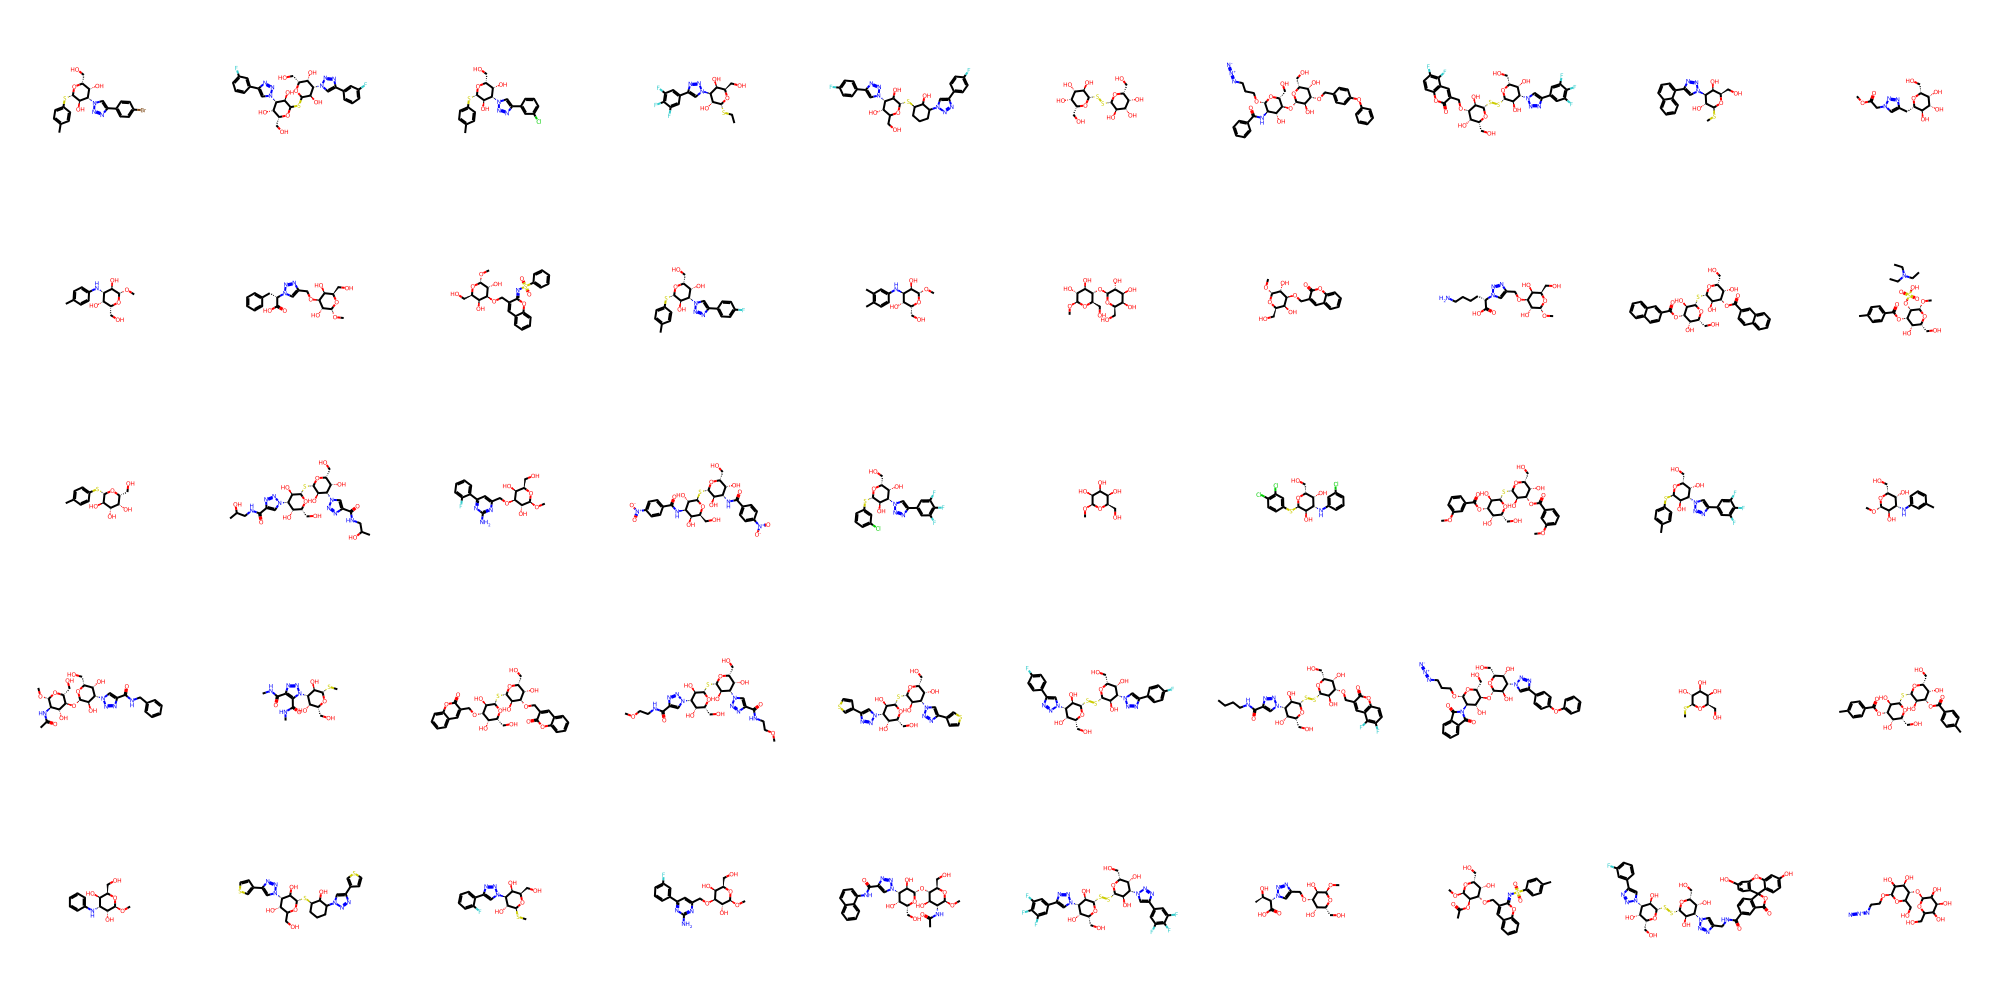

In [13]:
# unsorted
ms = [Chem.MolFromSmiles(x) for x in unsorted]

Draw.MolsToGridImage(ms, molsPerRow=10)

Sorted below


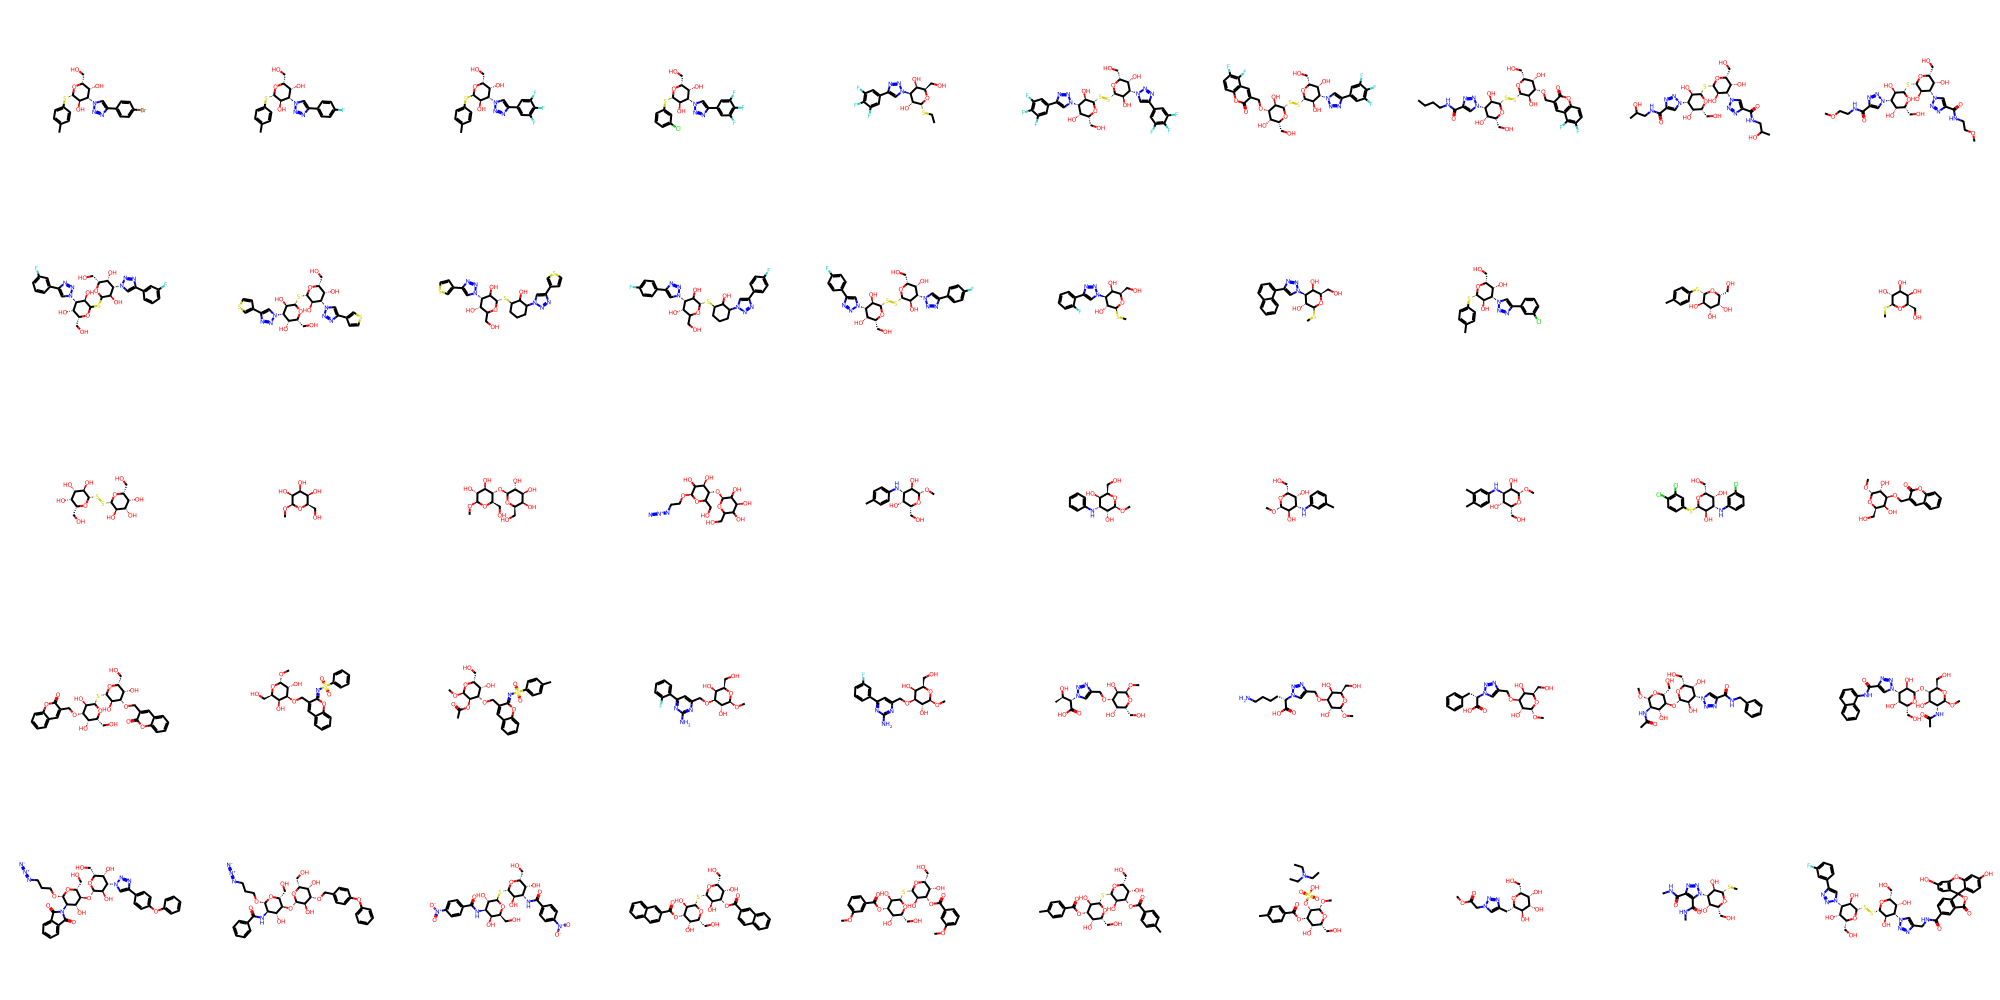

In [14]:

ms = [Chem.MolFromSmiles(x) for x in result]


Draw.MolsToGridImage(ms, molsPerRow=10)





In [18]:

# we will now use the dict made above to map each of the sorted list of smiles to their key

def SortedSmilesToCID(sorted_list, smileCIDkv):
  corresponding_cid_from_smiles = []
  for key in sorted_list:
    corresponding_cid_from_smiles.append(smileCIDkv[key])

  return corresponding_cid_from_smiles


SortedSmilesToCID(result, smileCIDkv)


[137651168,
 137661718,
 122443477,
 134812702,
 122443514,
 137656955,
 137636038,
 137655629,
 52946042,
 52941211,
 118436792,
 121493958,
 68014109,
 68014112,
 137632583,
 11544911,
 11617978,
 137636008,
 7315241,
 10036019,
 54768329,
 7568471,
 121942,
 124203882,
 155554378,
 155537041,
 155538998,
 155512458,
 155530852,
 118707323,
 71666730,
 118707321,
 118707320,
 155515859,
 155510726,
 122181347,
 122181350,
 122181348,
 52944831,
 52947288,
 71562354,
 71562246,
 44586822,
 25179518,
 25147695,
 25179327,
 49797472,
 11631088,
 52947047,
 137642445]

In [19]:

def SmileAndCID(smiles, cids):
  return dict(zip(smiles, cids))

SmileCID_dict = SmileAndCID(result, SortedSmilesToCID(result, smileCIDkv))
SmileCID_dict

{'CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC=C(C=C4)Br)O': 137651168,
 'CC1=CC=C(C=C1)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC=C(C=C4)F)O': 137661718,
 'CC1=CC=C(C=C1)S[C@@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=C(C(=C4)F)F)F)O': 122443477,
 'C1=CC(=CC(=C1)Cl)S[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)N3C=C(N=N3)C4=CC(=C(C(=C4)F)F)F)O': 134812702,
 'CCS[C@@H]1[C@@H]([C@H]([C@H]([C@H](O1)CO)O)N2C=C(N=N2)C3=CC(=C(C(=C3)F)F)F)O': 122443514,
 'C1=C(C=C(C(=C1F)F)F)C2=CN(N=N2)[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)SS[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=C(C(=C6)F)F)F)O)CO)O': 137656955,
 'C1=CC(=C(C2=C1OC(=O)C(=C2)CO[C@H]3[C@H]([C@H](O[C@H]([C@@H]3O)SS[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)N5C=C(N=N5)C6=CC(=C(C(=C6)F)F)F)O)CO)O)F)F': 137636038,
 'CCCCNC(=O)C1=CN(N=N1)[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)SS[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)CO)O)OCC4=CC5=C(C=CC(=C5F)F)OC4=O)O)CO)O': 137655629,
 'CC(CNC(=O)C1=CN(N=N1)[C@H]2[C@H](

In [22]:
# draw using the smile and generate name using the cid
def drawAndName(dictio):
  for smiles, cid in dictio.items():

    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    img.thumbnail((200,200))


    img_name = os.path.join('/content', f'{cid}.png')
    # print(img_path)
    img.save(img_name)

    !cp "{img_name}" "/content/drive/MyDrive/DerdaLabComputing/ForRatmir/sorted_StructureImages"

# https://drive.google.com/drive/folders/1-CAqlTdi2dbhOeGenAiu26xZovVdvXhX?usp=share_link

  # for smiles in dictio.values():
  #   print(smiles)


drawAndName(SmileCID_dict)

In [26]:
print(len(SmileCID_dict))

json_data = json.dumps(SmileCID_dict, indent=50)
# print(json_data)

# Set the file path and name
file_path = '/content/drive/MyDrive/DerdaLabComputing/ForRatmir/sorted_json/'
file_name = 'SmileCID_dict.json'

# Write the JSON data to a file
with open(file_name, 'w') as f:
    f.write(json_data)

# Copy the file to Google Drive
!cp $file_name $file_path

50
